In [954]:
# Import Packages
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
from statsmodels.tools.eval_measures import rmse

In [955]:
# Read in shark data
eat = pd.read_excel("SharkData.xlsx", sheet_name = 0)
targets = pd.read_excel("SharkData.xlsx", sheet_name = 1)
drops = pd.read_excel("SharkData.xlsx", sheet_name = 2)
other_factors = pd.read_excel("SharkData.xlsx", sheet_name = 3)

# Data Cleaning

In [956]:
# Clean eating dataset
eat = eat.iloc[1:,:-1]
eat.rename(columns = {"Unnamed: 14":'Etc. Comments', "Pieces Eaten": "Date", 'Total: ' : 'Total'}, inplace = True)

#get rid of null values at end of dataset
eat = eat.head(582)

# Change date to just date format, not datetime
eat['Date'] = pd.to_datetime(eat['Date']).dt.date



eat.reset_index(drop=True,inplace = True)
eat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total,Etc. Comments
0,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,0.0,2.0,3.0,1.0,33.0,NaN
1,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,3.0,1.0,0.0,6.0,NaN
3,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN
4,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,2.0,3.0,2.0,0.0,27.0,NaN


In [957]:
# Clean Drops Dataset
drops = drops.iloc[1:,:-1]
drops['Drops'] = pd.to_datetime(drops['Drops']).dt.date
drops.rename(columns = {"Drops" : "Date", "Total: ":"Total"}, inplace = True)
drops.reset_index(drop=True,inplace = True)
drops.tail()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total
577,2020-09-22,0.0,0.0,1.0,4.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,10.0
578,2020-09-24,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0
579,2020-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
580,2020-09-27,0.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0
581,2020-09-29,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0


In [958]:
# Clean Targets Dataset
targets = targets.iloc[1:,:-1]
targets.rename(columns = {"Unnamed: 14":'Etc. Comments', "Targets": "Date", "Total: ": "Total"}, inplace = True)

#get rid of null values at end of dataset
targets = targets.head(582)

# Change date to just date format, not datetime
targets['Date'] = pd.to_datetime(targets['Date']).dt.date

targets.reset_index(drop=True,inplace = True)
targets.tail()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total
577,2020-09-22,6.0,1.0,4.0,6.0,5.0,4.0,7.0,2.0,1.0,5.0,4.0,1.0,46.0
578,2020-09-24,8.0,18.0,2.0,9.0,10.0,10.0,11.0,5.0,6.0,3.0,7.0,9.0,98.0
579,2020-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,3.0,5.0,8.0,24.0
580,2020-09-27,10.0,19.0,9.0,10.0,8.0,16.0,3.0,NaN,NaN,NaN,NaN,NaN,75.0
581,2020-09-29,15.0,5.0,6.0,6.0,4.0,4.0,7.0,4.0,1.0,4.0,4.0,1.0,61.0


# Other Factors Data Cleaning and Dummy Variable Creation for Foods


In [959]:
dummy_factors = other_factors[['Saury', 'Blue Runner',
                'Squid', 'Mackerel', 'Herring', 'Sardine',
                'Mazuri Vitamins', 'Garlic', 'Salmon', 'Bonito', 'Bluefish', 'Mahi',
                    'Goggle Eye', 'Humbolt Squid']]

for i in dummy_factors:
    dummy_factors[i] = dummy_factors[i].fillna(0)
dummy_factors.rename(columns = {"Blue Runner": "Blue_Runner", "Mazuri Vitamins": "Mazuri_Vitamins", 
                               "Goggle Eye": "Goggle_Eye", "Humbolt Squid": "Humbolt_Squid"}, inplace = True)

/home/stats/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/stats/.local/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Combine Datasets to get all factors to perform regression on

In [960]:
# combine eat data
eat_concat1 = pd.concat([eat,dummy_factors], axis = 1)
eat_concat = pd.concat([eat_concat1, other_factors["Temperature"]], axis = 1)
eat_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,Sardine,Mazuri_Vitamins,Garlic,Salmon,Bonito,Bluefish,Mahi,Goggle_Eye,Humbolt_Squid,Temperature
0,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
1,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
3,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
4,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.4


In [961]:
# Add eat variable for Covid shut down
start_date = pd.to_datetime('03-14-2020')
end_date = pd.to_datetime('05-09-2020')
conditions = [ (eat_concat['Date'] >= start_date) & (eat_concat['Date'] <= end_date),
              (eat_concat['Date'] < start_date) | (eat_concat['Date'] > end_date)]
values = [1, 0]
eat_concat["covid"] = np.select(conditions, values)

In [962]:
# Add eat variable for light training
light_start = pd.to_datetime('02-15-2018')
conditions_light = [ (eat_concat['Date'] >= light_start), (eat_concat['Date'] < light_start)]
values_light = [1, 0]
eat_concat["light_training"] = np.select(conditions_light, values_light)

In [963]:
# combine drops data
drops_concat1 = pd.concat([drops,dummy_factors], axis = 1)
drops_concat = pd.concat([drops_concat1, other_factors["Temperature"]], axis = 1)
drops_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,Sardine,Mazuri_Vitamins,Garlic,Salmon,Bonito,Bluefish,Mahi,Goggle_Eye,Humbolt_Squid,Temperature
0,2017-12-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
1,2017-12-07,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
3,2017-12-10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
4,2017-12-12,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.4


In [964]:
# Add drop variable for Covid shut down
start_date = pd.to_datetime('03-14-2020')
end_date = pd.to_datetime('05-09-2020')
conditions = [ (drops_concat['Date'] >= start_date) & (drops_concat['Date'] <= end_date),
              (drops_concat['Date'] < start_date) | (drops_concat['Date'] > end_date)]
values = [1, 0]
drops_concat["covid"] = np.select(conditions, values)

In [965]:
# Add drop variable for light training
light_start = pd.to_datetime('02-15-2018')
conditions_light = [ (drops_concat['Date'] >= light_start), (drops_concat['Date'] < light_start)]
values_light = [1, 0]
drops_concat["light_training"] = np.select(conditions_light, values_light)

In [966]:
# combine Target data
targets_concat1 = pd.concat([targets,dummy_factors], axis = 1)
targets_concat = pd.concat([targets_concat1, other_factors["Temperature"]], axis = 1)
targets_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,Sardine,Mazuri_Vitamins,Garlic,Salmon,Bonito,Bluefish,Mahi,Goggle_Eye,Humbolt_Squid,Temperature
0,2017-12-05,3.0,0.0,4.0,3.0,0.0,2.0,2.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
1,2017-12-07,4.0,5.0,2.0,2.0,5.0,3.0,5.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
3,2017-12-10,4.0,7.0,0.0,2.0,2.0,0.0,0.0,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
4,2017-12-12,3.0,1.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.4


In [967]:
# Add target variable for Covid shut down
start_date = pd.to_datetime('03-14-2020')
end_date = pd.to_datetime('05-09-2020')
conditions = [ (targets_concat['Date'] >= start_date) & (targets_concat['Date'] <= end_date),
              (targets_concat['Date'] < start_date) | (targets_concat['Date'] > end_date)]
values = [1, 0]
targets_concat["covid"] = np.select(conditions, values)

In [968]:
# Add target variable for light training
light_start = pd.to_datetime('02-15-2018')
conditions_light = [ (targets_concat['Date'] >= light_start), (targets_concat['Date'] < light_start)]
values_light = [1, 0]
targets_concat["light_training"] = np.select(conditions_light, values_light)

In [969]:
# Add group feed variable to eat, drop, and target datasets
GroupFeed = []
for row in drops.index:
    if drops.iloc[row,:].isna().sum() > 0:
        GroupFeed.append(0)
    else:
        GroupFeed.append(1)
GroupFeed

eat_concat["GroupFeed"] = GroupFeed
drops_concat["GroupFeed"] = GroupFeed
targets_concat["GroupFeed"] = GroupFeed
targets_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,Salmon,Bonito,Bluefish,Mahi,Goggle_Eye,Humbolt_Squid,Temperature,covid,light_training,GroupFeed
0,2017-12-05,3.0,0.0,4.0,3.0,0.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.2,0,0,1
1,2017-12-07,4.0,5.0,2.0,2.0,5.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.2,0,0,1
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.6,0,0,0
3,2017-12-10,4.0,7.0,0.0,2.0,2.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,73.6,0,0,0
4,2017-12-12,3.0,1.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.4,0,0,1


In [970]:
# add column to dataset that indicates whether targets were being varied or not
varied_start1 = pd.to_datetime('04-01-2018')
varied_stop = pd.to_datetime('05-12-2018')
varied_start2 = pd.to_datetime('07-26-2018')

eat_concat["Varied_Target"] = [1 if (varied_start1 <= ele <= varied_stop) | (ele >= varied_start2)  else 0 for ele in eat_concat["Date"]]
drops_concat["Varied_Target"] = [1 if (varied_start1 <= ele <= varied_stop) | (ele >= varied_start2)  else 0 for ele in drops_concat["Date"]]
targets_concat["Varied_Target"] = [1 if (varied_start1 <= ele <= varied_stop) | (ele >= varied_start2)  else 0 for ele in targets_concat["Date"]]

# Subset Creation

In [971]:

# All SS Subset
All_SS = eat_concat[['Ross', 'Chandler']]

# All BT Subset
All_BT = eat_concat[['BT1', 'BT2', 'BT3', 'BT4', 'BT5']]

# All GR Subset
All_GR = eat_concat[['GR1', 'GR2', 'GR3', 'GR4', 'GR5']]

# Male Subset
Male = eat_concat[["BT1","BT5","GR1","Ross","Chandler"]]

# Female Subset
female = eat_concat[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]]

# Append all subsets to original datasets
# eat dataset
eat_concat["All_GR"] = eat['GR1'] + eat['GR2'] + eat['GR3'] + eat['GR4'] + eat['GR5']
eat_concat["All_BT"] = eat['BT1'] + eat['BT2'] + eat['BT3'] + eat['BT4'] + eat['BT5']
eat_concat["All_SS"] = eat['Ross'] + eat['Chandler']
eat_concat["male"] = eat[["BT1","BT5","GR1","Ross","Chandler"]].sum(axis = 1)
eat_concat["female"] = eat[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]].sum(axis = 1)

# drop dataset
drops_concat["All_GR"] = drops['GR1'] + drops['GR2'] + drops['GR3'] + drops['GR4'] + drops['GR5']
drops_concat["All_BT"] = drops['BT1'] + drops['BT2'] + drops['BT3'] + drops['BT4'] + drops['BT5']
drops_concat["All_SS"] = drops['Ross'] + drops['Chandler']
drops_concat["male"] = drops[["BT1","BT5","GR1","Ross","Chandler"]].sum(axis = 1)
drops_concat["female"] = drops[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]].sum(axis = 1)

# target dataset
targets_concat["All_GR"] = targets['GR1'] + targets['GR2'] + targets['GR3'] + targets['GR4'] + targets['GR5']
targets_concat["All_BT"] = targets['BT1'] + targets['BT2'] + targets['BT3'] + targets['BT4'] + targets['BT5']
targets_concat["All_SS"] = targets['Ross'] + targets['Chandler']
targets_concat["male"] = targets[["BT1","BT5","GR1","Ross","Chandler"]].sum(axis = 1)
targets_concat["female"] = targets[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]].sum(axis = 1)


# Create Tables for Poisson Regression Time Series For Pieces Eaten For All Sharks

In [972]:
# create additional time variables for eating
eat_concat['Date'] = pd.to_datetime(eat_concat['Date'])
eat_concat['Day_of_week'] = pd.to_datetime(eat_concat['Date']).dt.dayofweek
eat_concat['Month'] = pd.to_datetime(eat_concat['Date']).dt.month
eat_concat['Day'] = pd.to_datetime(eat_concat['Date']).dt.day
eat_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,GroupFeed,Varied_Target,All_GR,All_BT,All_SS,male,female,Day_of_week,Month,Day
0,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,0.0,...,1,0,6.0,22.0,5.0,12.0,21.0,1,12,5
1,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0.0,2.0,1.0,1.0,2.0,3,12,7
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,...,0,0,6.0,NaN,NaN,2.0,4.0,5,12,9
3,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,NaN,...,0,0,NaN,8.0,6.0,7.0,7.0,6,12,10
4,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,2.0,...,1,0,7.0,16.0,4.0,9.0,18.0,1,12,12


In [973]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concat)) < 0.8
eat_train = eat_concat[mask]
eat_test = eat_concat[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=466
Testing data set length=116


In [974]:
# setup Poisson regression expression
expr = """Total ~ Day_of_week + Temperature + Saury + Blue_Runner + Mackerel + Herring + Sardine + Garlic + Bluefish + 
covid + light_training + GroupFeed + Varied_Target"""

In [975]:
# setup Poisson regression expression
#expr = """Total ~ Day_of_week + Month + Day + Temperature + Saury + Blue_Runner + Mackerel + Sardine + Mazuri_Vitamins + Garlic + Salmon + Bonito + Bluefish + Humbolt_Squid + covid + light_training + GroupFeed + Varied_Target"""

In [976]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [977]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  466
Model:                            GLM   Df Residuals:                      452
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1693.2
Date:                Wed, 09 Dec 2020   Deviance:                       1198.6
Time:                        00:20:01   Pearson chi2:                 1.08e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.5852      0.560     -1.

In [978]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    19.903591  0.900473      18.214683      21.749098
19   13.786898  0.665549      12.542255      15.155054
23   13.613429  0.653581      12.390856      14.956630
31   11.187867  0.617289      10.041126      12.465572
38    7.824930  0.409110       7.062804       8.669295
..         ...       ...            ...            ...
564  20.877558  0.589621      19.753325      22.065775
571  11.264127  0.359444      10.581208      11.991122
577  29.949879  0.588476      28.818415      31.125767
578  29.038368  0.614533      27.858544      30.268159
581  29.760866  0.572993      28.658745      30.905371

[116 rows x 4 columns]


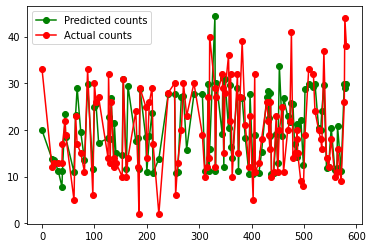

In [979]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Total']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Poisson Regression for Number of Drops for All Sharks

In [980]:
# create additional time variables for dropping
drops_concat['Date'] = pd.to_datetime(drops_concat['Date'])
drops_concat['Day_of_week'] = pd.to_datetime(drops_concat['Date']).dt.dayofweek
drops_concat['Month'] = pd.to_datetime(drops_concat['Date']).dt.month
drops_concat['Day'] = pd.to_datetime(drops_concat['Date']).dt.day
drops_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,GroupFeed,Varied_Target,All_GR,All_BT,All_SS,male,female,Day_of_week,Month,Day
0,2017-12-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,2.0,1.0,0.0,0.0,3.0,1,12,5
1,2017-12-07,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,...,1,0,2.0,7.0,1.0,4.0,6.0,3,12,7
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,0,0,1.0,NaN,NaN,0.0,1.0,5,12,9
3,2017-12-10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,...,0,0,NaN,1.0,0.0,1.0,0.0,6,12,10
4,2017-12-12,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,1,0,1.0,2.0,0.0,0.0,3.0,1,12,12


In [981]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concat)) < 0.8
drops_train = drops_concat[mask]
drops_test = drops_concat[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=466
Testing data set length=116


In [982]:
# setup Poisson regression expression
expr = """Total ~ Blue_Runner + Squid + Mackerel + Herring + Salmon + Mahi + Temperature +
covid + light_training + GroupFeed + Month + Day"""

In [983]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [984]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  466
Model:                            GLM   Df Residuals:                      453
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1047.8
Date:                Wed, 09 Dec 2020   Deviance:                       899.88
Time:                        00:20:02   Pearson chi2:                 1.02e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.4250      1.447      5.

In [985]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    5.566892  0.577458       4.542730       6.821951
19   3.354946  0.360406       2.717972       4.141199
23   3.608558  0.372472       2.947633       4.417676
31   4.087978  0.444059       3.304047       5.057908
38   1.456493  0.178555       1.145400       1.852079
..        ...       ...            ...            ...
564  2.539051  0.205550       2.166517       2.975642
571  1.188637  0.107951       0.994818       1.420218
577  3.633583  0.214658       3.236305       4.079629
578  4.829044  0.296604       4.281339       5.446815
581  3.827030  0.255730       3.357243       4.362555

[116 rows x 4 columns]


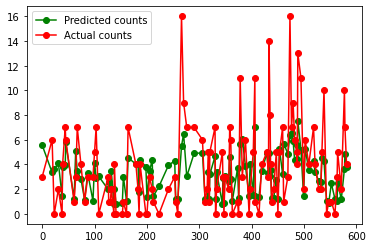

In [986]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Total']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Poisson Regression for Number of Targets for All Sharks

In [987]:
# create additional time variables for Targeting
targets_concat['Date'] = pd.to_datetime(targets_concat['Date'])
targets_concat['Day_of_week'] = pd.to_datetime(targets_concat['Date']).dt.dayofweek
targets_concat['Month'] = pd.to_datetime(targets_concat['Date']).dt.month
targets_concat['Day'] = pd.to_datetime(targets_concat['Date']).dt.day
targets_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,GroupFeed,Varied_Target,All_GR,All_BT,All_SS,male,female,Day_of_week,Month,Day
0,2017-12-05,3.0,0.0,4.0,3.0,0.0,2.0,2.0,1.0,1.0,...,1,0,8.0,11.0,3.0,10.0,12.0,1,12,5
1,2017-12-07,4.0,5.0,2.0,2.0,5.0,3.0,5.0,0.0,0.0,...,1,0,4.0,17.0,9.0,16.0,14.0,3,12,7
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,...,0,0,8.0,NaN,NaN,1.0,7.0,5,12,9
3,2017-12-10,4.0,7.0,0.0,2.0,2.0,0.0,0.0,NaN,NaN,...,0,0,NaN,4.0,11.0,11.0,4.0,6,12,10
4,2017-12-12,3.0,1.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,...,1,0,11.0,11.0,4.0,9.0,17.0,1,12,12


In [988]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concat)) < 0.8
targets_train = targets_concat[mask]
targets_test = targets_concat[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=466
Testing data set length=116


In [989]:
# setup Poisson regression expression
expr = """Total ~ Blue_Runner + Squid + Mackerel + Herring + Salmon + Mahi + Temperature +
covid + light_training + GroupFeed + Month + Day"""

In [990]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [991]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  466
Model:                            GLM   Df Residuals:                      453
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3771.6
Date:                Wed, 09 Dec 2020   Deviance:                       4905.2
Time:                        00:20:03   Pearson chi2:                 5.30e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.0835      0.334      9.

In [992]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    41.937795  1.378062      39.321982      44.727620
19   36.186152  1.190100      33.927187      38.595526
23   36.279270  1.163721      34.068637      38.633345
31   36.474291  1.207348      34.183061      38.919098
38   17.942822  0.615919      16.775356      19.191536
..         ...       ...            ...            ...
564  59.712709  1.109547      57.577161      61.927466
571  29.290175  0.571058      28.192036      30.431089
577  69.543952  0.981839      67.645964      71.495192
578  77.677069  1.202134      75.356305      80.069306
581  69.738331  1.135821      67.547320      72.000412

[116 rows x 4 columns]


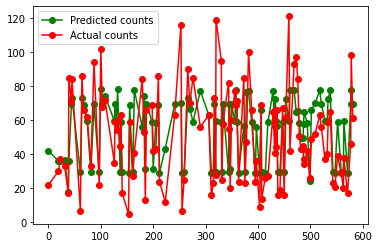

In [993]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Total']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Poisson Regression Across Different Species of Sharks

# Sandbar Sharks

In [994]:
expr = """All_SS ~ Squid + Mackerel + Herring + Sardine + Garlic + Salmon + Bonito + Bluefish +
covid + light_training"""

In [995]:
eat_concatSS = eat_concat[eat_concat['All_SS'].notna()]

In [996]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concatSS)) < 0.8
eat_train = eat_concatSS[mask]
eat_test = eat_concatSS[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=357
Testing data set length=82


Eating:

In [997]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [998]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_SS   No. Observations:                  357
Model:                            GLM   Df Residuals:                      346
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -996.42
Date:                Wed, 09 Dec 2020   Deviance:                       757.22
Time:                        00:20:04   Pearson chi2:                     676.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3283      0.105     12.

In [999]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0     4.750022  0.416924       3.999291       5.641677
25    4.176968  0.395414       3.469619       5.028523
31    5.497339  0.579467       4.471246       6.758908
41    5.976489  0.245990       5.513292       6.478602
50   12.048083  1.411824       9.575733      15.158766
..         ...       ...            ...            ...
573   5.976489  0.245990       5.513292       6.478602
574   5.976489  0.245990       5.513292       6.478602
577   5.976489  0.245990       5.513292       6.478602
578   5.255471  0.258526       4.772430       5.787403
581   5.976489  0.245990       5.513292       6.478602

[82 rows x 4 columns]


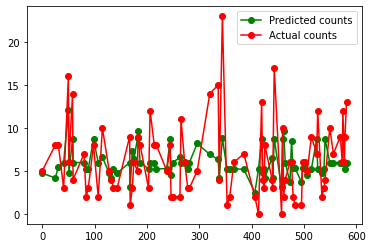

In [1000]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_SS']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Dropping:

In [1001]:
drops_concatSS = drops_concat[drops_concat['All_SS'].notna()]

In [1002]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concatSS)) < 0.8
drops_train = drops_concatSS[mask]
drops_test = drops_concatSS[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=357
Testing data set length=81


In [1003]:
expr = """All_SS ~ Blue_Runner + Squid + Mackerel + Salmon + Temperature + light_training +
Varied_Target + Day"""

In [1004]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [1005]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_SS   No. Observations:                  357
Model:                            GLM   Df Residuals:                      348
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -280.73
Date:                Wed, 09 Dec 2020   Deviance:                       347.75
Time:                        00:20:05   Pearson chi2:                     448.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.0385      4.678      1.

In [1006]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    0.315659  0.103031       0.166489       0.598480
25   0.552273  0.173886       0.297953       1.023669
31   0.707292  0.224042       0.380164       1.315909
41   1.162844  0.371390       0.621819       2.174598
50   0.764554  0.221443       0.433380       1.348801
..        ...       ...            ...            ...
570  0.232927  0.091710       0.107666       0.503920
574  0.441428  0.125415       0.252943       0.770365
576  0.389485  0.067201       0.277732       0.546206
578  0.363805  0.076066       0.241487       0.548078
580  0.425993  0.087319       0.285052       0.636620

[81 rows x 4 columns]


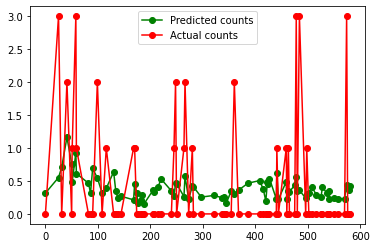

In [1007]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_SS']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Targets:

In [1008]:
targets_concatSS = targets_concat[targets_concat['All_SS'].notna()]

In [1009]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concatSS)) < 0.8
targets_train = targets_concatSS[mask]
targets_test = targets_concatSS[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=356
Testing data set length=81


In [1010]:
expr = """All_SS ~ Squid + Mackerel + Sardine + Salmon + Bluefish + Goggle_Eye + Humbolt_Squid + 
Temperature + covid + light_training + Day_of_week + Day"""

In [1011]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [1012]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_SS   No. Observations:                  356
Model:                            GLM   Df Residuals:                      343
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1615.5
Date:                Wed, 09 Dec 2020   Deviance:                       1598.0
Time:                        00:20:06   Pearson chi2:                 1.57e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.1262      0.638      6.

In [1013]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    10.466465  0.605866       9.343876      11.723924
25   11.983288  0.705253      10.677761      13.448437
31   17.276220  1.005515      15.413699      19.363800
41   20.637569  0.648742      19.404436      21.949067
50   22.694597  0.706871      21.350597      24.123201
..         ...       ...            ...            ...
572  24.570673  0.530951      23.551757      25.633670
576  25.214413  0.557422      24.145216      26.330956
577  16.582096  0.442836      15.736478      17.473155
580  25.742072  0.696546      24.412437      27.144126
581  17.104423  0.532454      16.092030      18.180508

[81 rows x 4 columns]


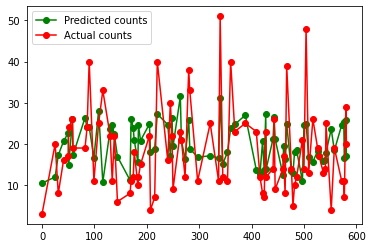

In [1014]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_SS']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Blacktip Sharks

Eating:

In [1015]:
expr = """All_BT ~ Squid + Mackerel + Herring + Mazuri_Vitamins + Garlic + Bonito + Bluefish +
Temperature + GroupFeed + Varied_Target"""

In [1016]:
eat_concatBT = eat_concat[eat_concat['All_BT'].notna()]

In [1017]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concatBT)) < 0.8
eat_train = eat_concatBT[mask]
eat_test = eat_concatBT[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=356
Testing data set length=80


In [1018]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [1019]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_BT   No. Observations:                  356
Model:                            GLM   Df Residuals:                      345
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1169.9
Date:                Wed, 09 Dec 2020   Deviance:                       809.45
Time:                        00:20:06   Pearson chi2:                     786.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2309      0.764     

In [1020]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0     9.370551  0.445080       8.537583      10.284787
27    7.423021  0.385265       6.705051       8.217870
32    9.083477  0.455277       8.233580      10.021103
43    7.578606  0.382320       6.865126       8.366237
51   10.131915  0.586749       9.044772      11.349729
..         ...       ...            ...            ...
560  12.119491  0.410188      11.341622      12.950709
573  14.830501  0.405422      14.056801      15.646786
577  14.830501  0.405422      14.056801      15.646786
578  17.218912  0.500968      16.264503      18.229327
581  14.677479  0.392838      13.927378      15.467980

[80 rows x 4 columns]


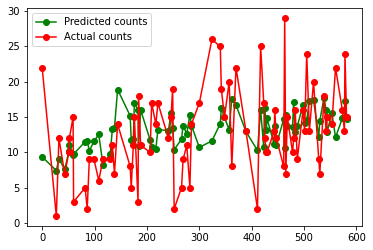

In [1021]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_BT']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Dropping:

In [1022]:
drops_concatBT = drops_concat[drops_concat['All_BT'].notna()]

In [1023]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concatBT)) < 0.8
drops_train = drops_concatBT[mask]
drops_test = drops_concatBT[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=356
Testing data set length=80


In [1024]:
expr = """All_BT ~ Saury + Mackerel + Garlic + Salmon + Bonito + Mahi + Temperature + covid"""

In [1025]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [1026]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_BT   No. Observations:                  356
Model:                            GLM   Df Residuals:                      347
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -766.70
Date:                Wed, 09 Dec 2020   Deviance:                       569.07
Time:                        00:20:07   Pearson chi2:                     560.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.7742      1.606      6.085      

In [1027]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    3.238623  0.217802       2.838676       3.694920
25   4.280578  0.253176       3.812044       4.806699
31   4.256415  0.367801       3.593278       5.041933
41   4.375553  0.268341       3.879994       4.934406
50   3.121070  0.185959       2.777073       3.507679
..        ...       ...            ...            ...
560  2.398486  0.152170       2.118036       2.716071
573  2.488824  0.160285       2.193689       2.823665
577  2.488824  0.160285       2.193689       2.823665
578  3.289547  0.187787       2.941335       3.678982
581  2.544044  0.160362       2.248380       2.878588

[80 rows x 4 columns]


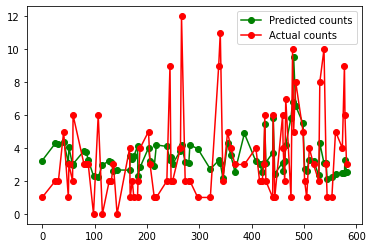

In [1028]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_BT']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Targeting:

In [1029]:
targets_concatBT = targets_concat[targets_concat['All_BT'].notna()]

In [1030]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concatBT)) < 0.8
targets_train = targets_concatBT[mask]
targets_test = targets_concatBT[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=356
Testing data set length=81


In [1031]:
expr = """All_BT ~ Squid + Mackerel + Herring + Mazuri_Vitamins + Garlic + Salmon + Bonito + 
Bluefish + Temperature + covid + light_training + Varied_Target + Day_of_week + Month"""

In [1032]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [1033]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_BT   No. Observations:                  356
Model:                            GLM   Df Residuals:                      341
Model Family:                 Poisson   Df Model:                           14
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1959.2
Date:                Wed, 09 Dec 2020   Deviance:                       2006.0
Time:                        00:20:08   Pearson chi2:                 2.05e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.9950      0.477     

In [1034]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    19.011883  0.881531      17.360298      20.820592
25   27.312978  1.226359      25.012085      29.825532
31   27.681036  1.347891      25.161367      30.453026
41   38.584879  1.490540      35.771332      41.619723
50   36.270446  2.237324      32.140080      40.931610
..         ...       ...            ...            ...
572  39.154094  0.699348      37.807111      40.549066
576  39.154094  0.699348      37.807111      40.549066
577  34.467283  0.719025      33.086442      35.905753
580  39.053296  0.705330      37.695056      40.460477
581  34.556244  0.714454      33.183932      35.985308

[81 rows x 4 columns]


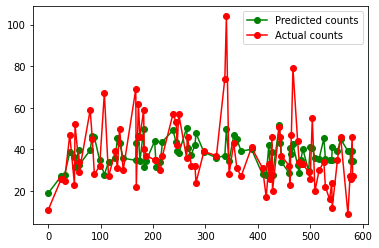

In [1035]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_BT']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Gray Reef Sharks

Eating:

In [1036]:
expr = """All_GR ~ Saury + Blue_Runner + Squid + Herring + Sardine + Garlic + Bonito + Bluefish +
Humbolt_Squid + covid + Varied_Target + Month"""

In [1037]:
eat_concatGR = eat_concat[eat_concat['All_GR'].notna()]

In [1038]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concatGR)) < 0.8
eat_train = eat_concatGR[mask]
eat_test = eat_concatGR[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=356
Testing data set length=81


In [1039]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [1040]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_GR   No. Observations:                  356
Model:                            GLM   Df Residuals:                      343
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -940.21
Date:                Wed, 09 Dec 2020   Deviance:                       575.41
Time:                        00:20:09   Pearson chi2:                     513.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1935      0.132      9.016

In [1041]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0     6.892756  0.475748       6.020627       7.891220
25    4.994983  0.341302       4.368902       5.710783
30    8.281982  0.517442       7.327450       9.360858
41    4.044983  0.346201       3.420300       4.783757
50    3.955984  0.660827       2.851449       5.488371
..         ...       ...            ...            ...
571  11.959677  0.424500      11.155953      12.821305
575  11.959677  0.424500      11.155953      12.821305
577   8.786967  0.329703       8.163950       9.457529
579  11.959677  0.424500      11.155953      12.821305
581   8.786967  0.329703       8.163950       9.457529

[81 rows x 4 columns]


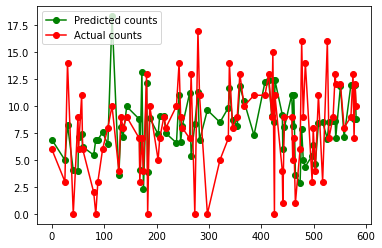

In [1042]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_GR']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Dropping:

In [1043]:
drops_concatGR = drops_concat[drops_concat['All_GR'].notna()]

In [1044]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concatGR)) < 0.8
drops_train = drops_concatGR[mask]
drops_test = drops_concatGR[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=357
Testing data set length=81


In [1045]:
expr = """All_GR ~ Blue_Runner + Squid + Mackerel + Herring + Bluefish + Humbolt_Squid + 
Temperature + covid + light_training + GroupFeed + Varied_Target + Day_of_week + Month"""

In [1046]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [1047]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_GR   No. Observations:                  357
Model:                            GLM   Df Residuals:                      343
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -471.21
Date:                Wed, 09 Dec 2020   Deviance:                       505.98
Time:                        00:20:10   Pearson chi2:                     507.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.7656      3.277      2.

In [1048]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    1.673579  0.326286       1.142072       2.452444
25   1.504990  0.308532       1.007006       2.249237
30   1.396571  0.276690       0.947158       2.059224
41   0.536515  0.169833       0.288493       0.997765
50   0.201594  0.145731       0.048882       0.831393
..        ...       ...            ...            ...
570  1.115146  0.126021       0.893590       1.391634
574  1.308315  0.250679       0.898707       1.904612
575  1.063297  0.114648       0.860747       1.313510
578  1.041952  0.128067       0.818891       1.325774
579  1.048957  0.113834       0.847977       1.297572

[81 rows x 4 columns]


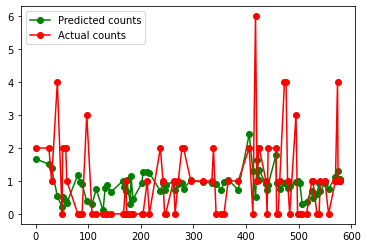

In [1049]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_GR']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Targeting:

In [1050]:
targets_concatGR = targets_concat[targets_concat['All_GR'].notna()]

In [1051]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concatGR)) < 0.8
targets_train = targets_concatGR[mask]
targets_test = targets_concatGR[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=356
Testing data set length=81


In [1052]:
expr = """All_GR ~ Saury + Blue_Runner + Squid + Herring + Sardine + Bonito + Bluefish + 
Mahi + Goggle_Eye + Humbolt_Squid + Temperature + covid + light_training + GroupFeed + Month"""

In [1053]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [1054]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_GR   No. Observations:                  356
Model:                            GLM   Df Residuals:                      340
Model Family:                 Poisson   Df Model:                           15
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1531.1
Date:                Wed, 09 Dec 2020   Deviance:                       1478.8
Time:                        00:20:11   Pearson chi2:                 1.43e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.5391      0.662     -0.

In [1055]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    13.237093  0.820049      11.723572      14.946011
25    9.242382  0.589597       8.156117      10.473321
30   15.344587  0.908287      13.663762      17.232174
41   10.855519  0.577163       9.781245      12.047780
50   14.225720  1.766983      11.151831      18.146896
..         ...       ...            ...            ...
571  24.843041  0.574518      23.742143      25.994985
575  24.843041  0.574518      23.742143      25.994985
577  18.102326  0.473104      17.198409      19.053753
579  25.004004  0.573831      23.904236      26.154370
581  17.985793  0.465131      17.096872      18.920931

[81 rows x 4 columns]


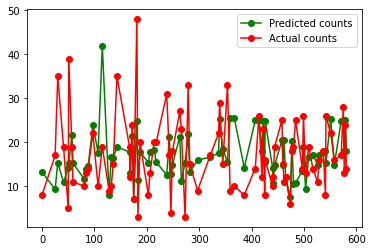

In [1056]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_GR']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Poisson Regression for Each Gender of Shark

# Male

Eating:

In [1057]:
expr = """male ~ Saury + Blue_Runner + Squid + Mackerel + Sardine + Garlic + Salmon + 
Bonito + Mahi + covid + light_training + GroupFeed"""

In [1058]:
eat_concatM = eat_concat[eat_concat['male'].notna()]

In [1059]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concatM)) < 0.8
eat_train = eat_concatM[mask]
eat_test = eat_concatM[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=466
Testing data set length=116


In [1060]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [1061]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   male   No. Observations:                  466
Model:                            GLM   Df Residuals:                      453
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1432.7
Date:                Wed, 09 Dec 2020   Deviance:                       1142.0
Time:                        00:20:12   Pearson chi2:                 1.09e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4977      0.086      5.

In [1062]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0     9.278318  0.623951       8.132563      10.585493
19    7.935424  0.554452       6.919843       9.100056
23    7.935424  0.554452       6.919843       9.100056
31    5.809832  0.472620       4.953586       6.814083
38    1.644924  0.142220       1.388516       1.948680
..         ...       ...            ...            ...
564  11.793323  0.345056      11.136052      12.489388
571   2.444622  0.143538       2.178877       2.742779
577  13.789080  0.406425      13.015073      14.609118
578  13.633593  0.426682      12.822445      14.496055
581  13.789080  0.406425      13.015073      14.609118

[116 rows x 4 columns]


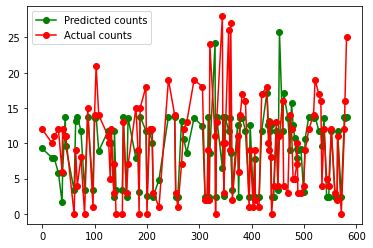

In [1063]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['male']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Dropping:

In [1064]:
drops_concatM = drops_concat[drops_concat['male'].notna()]

In [1065]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concatM)) < 0.8
drops_train = drops_concatM[mask]
drops_test = drops_concatM[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=466
Testing data set length=116


In [1066]:
expr = """male ~ Saury + Blue_Runner + Mackerel + Herring + Sardine + Salmon + Temperature +
covid + GroupFeed + Varied_Target + Month"""

In [1067]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [1068]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   male   No. Observations:                  466
Model:                            GLM   Df Residuals:                      454
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -701.46
Date:                Wed, 09 Dec 2020   Deviance:                       654.39
Time:                        00:20:13   Pearson chi2:                     686.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.1195      2.148      3.314

In [1069]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    3.543175  0.467131       2.736342       4.587909
19   1.943201  0.230446       1.540185       2.451674
23   2.021766  0.239608       1.602698       2.550411
31   2.145610  0.258472       1.694378       2.717009
38   0.449577  0.083367       0.312580       0.646615
..        ...       ...            ...            ...
564  0.987877  0.106392       0.799891       1.220043
571  0.267819  0.047598       0.189044       0.379419
577  1.548252  0.138693       1.298945       1.845408
578  1.830831  0.153854       1.552808       2.158633
581  1.579240  0.139288       1.328534       1.877258

[116 rows x 4 columns]


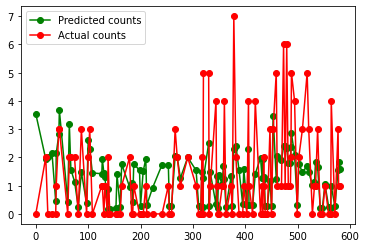

In [1070]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['male']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Targeting:

In [1071]:
targets_concatM = targets_concat[targets_concat['male'].notna()]

In [1072]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concatM)) < 0.8
targets_train = targets_concatM[mask]
targets_test = targets_concatM[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=466
Testing data set length=116


In [1073]:
expr = """male ~ Saury + Blue_Runner + Mackerel + Herring + Sardine + Garlic + Salmon + 
Humbolt_Squid + covid + light_training + GroupFeed + Varied_Target + Day_of_week + Day"""

In [1074]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [1075]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   male   No. Observations:                  466
Model:                            GLM   Df Residuals:                      451
Model Family:                 Poisson   Df Model:                           14
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.2
Date:                Wed, 09 Dec 2020   Deviance:                       3714.2
Time:                        00:20:14   Pearson chi2:                 3.94e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9785      0.102      9.

In [1076]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    20.906070  0.907260      19.201398      22.762080
19   23.072394  1.007239      21.180340      25.133466
23   23.391886  1.002358      21.507537      25.441329
31   20.055956  1.006543      18.177089      22.129031
38    3.828196  0.211927       3.434569       4.266937
..         ...       ...            ...            ...
564  39.484141  0.862657      37.829054      41.211642
571   6.286465  0.245541       5.823173       6.786617
577  35.357625  0.694809      34.021717      36.745990
578  40.573318  0.786414      39.060885      42.144313
581  35.847235  0.821856      34.272081      37.494783

[116 rows x 4 columns]


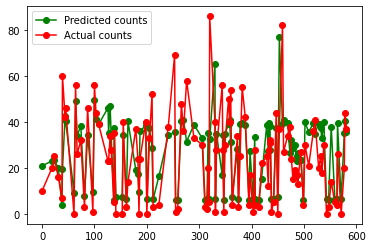

In [1077]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['male']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Female

Eating:

In [1078]:
expr = """female ~ Saury + Blue_Runner + Squid + Herring + Goggle_Eye + Humbolt_Squid + 
Temperature + covid + GroupFeed + Varied_Target + Day_of_week"""

In [1079]:
eat_concatF = eat_concat[eat_concat['female'].notna()]

In [1080]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concatF)) < 0.8
eat_train = eat_concatF[mask]
eat_test = eat_concatF[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=466
Testing data set length=116


In [1081]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [1082]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 female   No. Observations:                  466
Model:                            GLM   Df Residuals:                      454
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1427.6
Date:                Wed, 09 Dec 2020   Deviance:                       973.79
Time:                        00:20:15   Pearson chi2:                     894.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.9791      0.748     -2.647

In [1083]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    10.575794  0.479952       9.675728      11.559586
19    5.314179  0.261545       4.825508       5.852337
23    5.211922  0.259205       4.727863       5.745540
31    5.062213  0.258538       4.580023       5.595168
38    6.580766  0.314311       5.992684       7.226559
..         ...       ...            ...            ...
564   8.321629  0.332978       7.693939       9.000527
571   9.534443  0.331577       8.906218      10.206982
577  16.400835  0.429206      15.580817      17.264010
578  15.383697  0.462342      14.503696      16.317091
581  16.242273  0.416383      15.446341      17.079218

[116 rows x 4 columns]


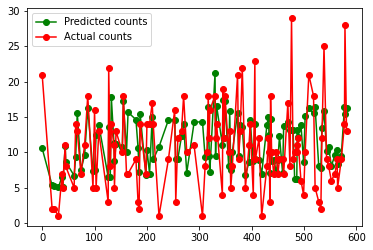

In [1084]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['female']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Dropping:

In [1085]:
drops_concatF = drops_concat[drops_concat['female'].notna()]

In [1086]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concatF)) < 0.8
drops_train = drops_concatF[mask]
drops_test = drops_concatF[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=466
Testing data set length=116


In [1087]:
expr = """female ~ Blue_Runner + Squid + Mackerel + Bluefish + Mahi + Temperature + covid + 
light_training + GroupFeed + Varied_Target"""

In [1088]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [1089]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 female   No. Observations:                  466
Model:                            GLM   Df Residuals:                      455
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -847.25
Date:                Wed, 09 Dec 2020   Deviance:                       755.55
Time:                        00:20:16   Pearson chi2:                     839.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.3071      1.921      3.

In [1090]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    2.701188  0.317438       2.145475       3.400841
19   1.978828  0.247077       1.549269       2.527488
23   2.057596  0.254020       1.615382       2.620866
31   2.181665  0.268306       1.714373       2.776327
38   1.111215  0.154513       0.846135       1.459339
..        ...       ...            ...            ...
564  1.391588  0.132613       1.154502       1.677363
571  0.913500  0.082579       0.765177       1.090575
577  1.937018  0.133163       1.692842       2.216413
578  2.546683  0.182774       2.212506       2.931333
581  1.975193  0.132130       1.732482       2.251906

[116 rows x 4 columns]


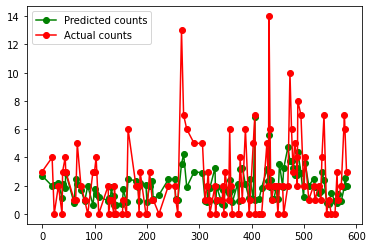

In [1091]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['female']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()


Targeting:

In [1092]:
targets_concatF = targets_concat[targets_concat['female'].notna()]

In [1093]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concatF)) < 0.8
targets_train = targets_concatF[mask]
targets_test = targets_concatF[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=466
Testing data set length=116


In [1094]:
expr = """female ~ Saury + Blue_Runner + Herring + Sardine + Salmon + Bonito + Bluefish + 
Goggle_Eye + Humbolt_Squid + Temperature + light_training + GroupFeed + Varied_Target + 
Day_of_week"""

In [1095]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [1096]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 female   No. Observations:                  466
Model:                            GLM   Df Residuals:                      451
Model Family:                 Poisson   Df Model:                           14
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2292.9
Date:                Wed, 09 Dec 2020   Deviance:                       2253.6
Time:                        00:20:17   Pearson chi2:                 2.25e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0913      0.485      2.

In [1097]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    22.129057  0.917556      20.401816      24.002528
19   15.163310  0.663346      13.917355      16.520810
23   15.089987  0.656822      13.856024      16.433842
31   14.980668  0.651441      13.756765      16.313458
38   13.355375  0.588370      12.250575      14.559810
..         ...       ...            ...            ...
564  24.572866  0.596153      23.431773      25.769530
571  21.227427  0.488929      20.290453      22.207669
577  35.774382  0.668946      34.487008      37.109814
578  36.141651  0.691678      34.811097      37.523062
581  35.687784  0.655900      34.425121      36.996758

[116 rows x 4 columns]


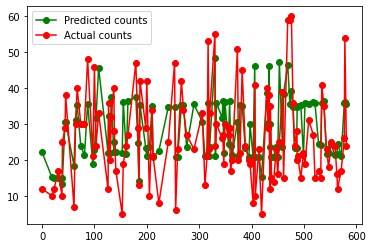

In [1098]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['female']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()